In [ ]:
#Certification Project - MOVIE RECOMMENDER SYSTEM

Domain – OTT Platform

Contxtx:
-------
Over the past two decades, there has been a monumental shift in how people access and consume video content. With the universal access to broadband internet, numerous platforms like YouTube, Netflix, and HBO Go emerged and steadily grew to prominence. Although not a household name in itself, OTT is the exact technology that made the streaming revolution possible. OTT stands for “Over The Top” which refers to any video streaming service delivering content to the users over the internet, however, there are subscription charges associated with the usage of such platforms such as PrimeVideo, Netflix, HotStart, Zee5, SonyLiv, etc. But choosing your next movie to watch can still be a daunting task, even if you have access to all the platform

Business Requirement:
--------------------

“MyNextMovie” is a budding startup in the space of recommendations on top of various OTT platforms providing suggestions to its customer base regarding their next movie. Their major business is to create a recommendation layer on top of these OTT platforms so that they can make suitable recommendations to their customers, however, since they are in research mode right now, they would want to experiment with open-source data first to understand the depth of the models which can be delivered by them.

The data for this exercise is open-source data that has been collected and made available from the MovieLens website (http://movielens.org), a part of GroupLens Research The data sets were collected over various periods of time, depending on the size of the s

You have recently joined as a Data Scientist at “MyNextMovie” and plan to help the existing team to set up a recommendation platform. https://www.kaggle.com/code/ayushimishra2809/movie-recommendation-system/data?select=ratings.csv


Data Description:
----------------

The data consists of 105339 ratings applied over 10329 movies. The average rating and minimum and maximum rating are 0.5 and 5 respectively. There are 668 users who have given their ratings for 149532 movThere are two data files which are provided:

Movies.csv

1. movieId:ID assigned to a movie
2. title:Title of a movie
3. genres: pipe-separated list of movie genres.

Ratings.csv

1. userId: ID assigned to a user
2. movieId:ID assigned to a movie
3. rating: rating by a user to a movie
4. Timestamp: time at which the rating was provided.the rating was pro


Objective:
---------

1. Create a popularity-based recommender system at a genre level.
The user will input a genre (g), minimum rating threshold (t) for a movie, and no. of recommendations(N) for which it should be recommended top N movies which are most popular within that genre (g) ordered by ratings in descending order where each movie has at least (t) reviews.

2. Create a content-based recommender system that recommends top N movies based on similar movie(m) genres.
3. Create a collaborative based recommender system which recommends top N movies based on “K” similarrr “u"ided. genres.et.s.

In [ ]:
#Steps and Tasks

1. Import libraries and load dataset

In [2]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Importing datasets

movies_df = pd.read_csv('movies.csv')


ratings_df = pd.read_csv('ratings.csv')

In [4]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [6]:
print("shape of the ratings_df dataset=",ratings_df.shape)
print("shape of the movies_df dataset=",movies_df.shape)

shape of the ratings_df dataset= (105339, 4)
shape of the movies_df dataset= (10329, 3)


In [7]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [8]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


2. Exploratory Data Analysis including:

a) Understanding of distribution of the features available
b) Finding unique users and movies
c) Average rating and Total movies at genre level.
d) Unique genres considered..

In [9]:
#Checking for null values

movies_df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [10]:
#Checking for null values

ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [11]:
#Checking for duplicates

df_dup = movies_df.copy()
duplicates = df_dup.duplicated()

if duplicates.any():
    print(f"{duplicates.sum()} duplicate(s) present in the dataframe:")
    print(df_dup[df_dup.duplicated() == True])
    df_dup.drop_duplicates(inplace=True)
else:
    print("No duplicates in the dataframe")

No duplicates in the dataframe


In [12]:
#Checking for duplicates

df_dup = ratings_df.copy()
duplicates = df_dup.duplicated()

if duplicates.any():
    print(f"{duplicates.sum()} duplicate(s) present in the dataframe:")
    print(df_dup[df_dup.duplicated() == True])
    df_dup.drop_duplicates(inplace=True)
else:
    print("No duplicates in the dataframe")

No duplicates in the dataframe


In [13]:
# Checking for duplicate movie titles: 

movies_df[movies_df['title'].duplicated()]

,movieId,title,genres
6270,26982,Men with Guns (1997),Drama
7963,64997,War of the Worlds (2005),Action|Sci-Fi


In [14]:
movies_df[movies_df['title']=='Men with Guns (1997)']

,movieId,title,genres
1403,1788,Men with Guns (1997),Action|Drama
6270,26982,Men with Guns (1997),Drama


In [15]:
movies_df[movies_df['title']=='War of the Worlds (2005)']

,movieId,title,genres
6662,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
7963,64997,War of the Worlds (2005),Action|Sci-Fi


In [16]:
#Remove the duplicate record of the movie

movies_df.drop(movies_df.loc[movies_df['movieId']==26982].index,inplace=True)
movies_df.drop(movies_df.loc[movies_df['movieId']==64997].index,inplace=True)

In [17]:
#Statistical description of the dataset

movies_df.describe()

,movieId
count,10327.000000
mean,31921.558923
std,37736.960408
min,1.000000
25%,3239.000000
50%,7087.000000
75%,59875.000000
max,149532.000000


In [18]:
#Statistical description of the dataset

ratings_df.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


From the above tables we can conclude that- 

1. The average rating is 3.516850 and minimum and maximum rating is 0.50 and 5.00 respectively.
2. There are 105339 users who has given their ratings for 10327 movies.
3. "movieId" is the common dimension between the 2 datasets

In [19]:
#Average rating and Total movies at genre level

print("The total count of movies -")
print(movies_df['movieId'].value_counts().sum())

print("Average rating of all ratings provided is -")
print(ratings_df['rating'].mean())

The total count of movies -
10327
Average rating of all ratings provided is -
3.5168503593161127


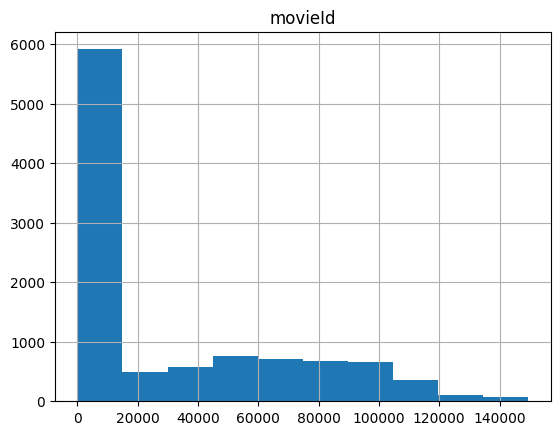

In [20]:
#Understanding of distribution of the features available

movies_df.hist()
plt.show()

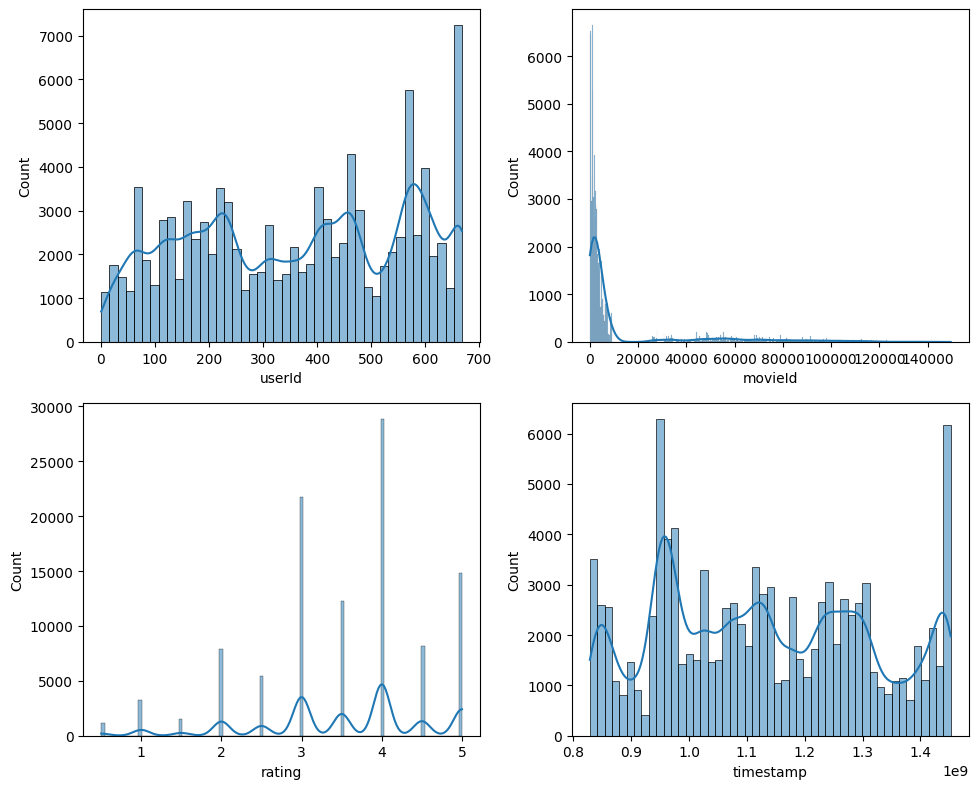

In [21]:
i=1
plt.figure(figsize=(10,8))
for j in ratings_df.columns:
    plt.subplot(2,2,i)
    sns.histplot(data=ratings_df,x=ratings_df[j],kde=True)
    i+=1
plt.tight_layout()
plt.show()

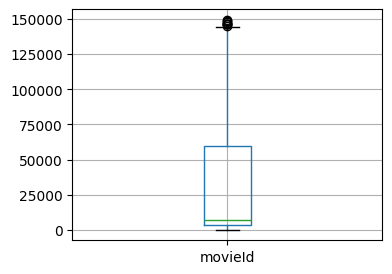

In [22]:
#Checking for Outliers

movies_df.boxplot(figsize=(4,3))
plt.show()

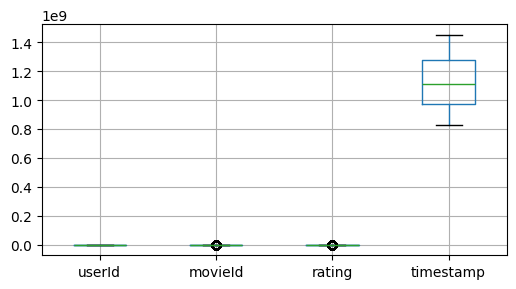

In [23]:
#Checking for Outliers

ratings_df.boxplot(figsize=(6,3))
plt.show()

In [24]:
#Find unique users and movies

movies_df.nunique()

movieId    10327
title      10327
genres       938
dtype: int64

In [25]:
ratings_df.nunique()

userId         668
movieId      10325
rating          10
timestamp    84686
dtype: int64

In [ ]:
#!pip install wordcloud

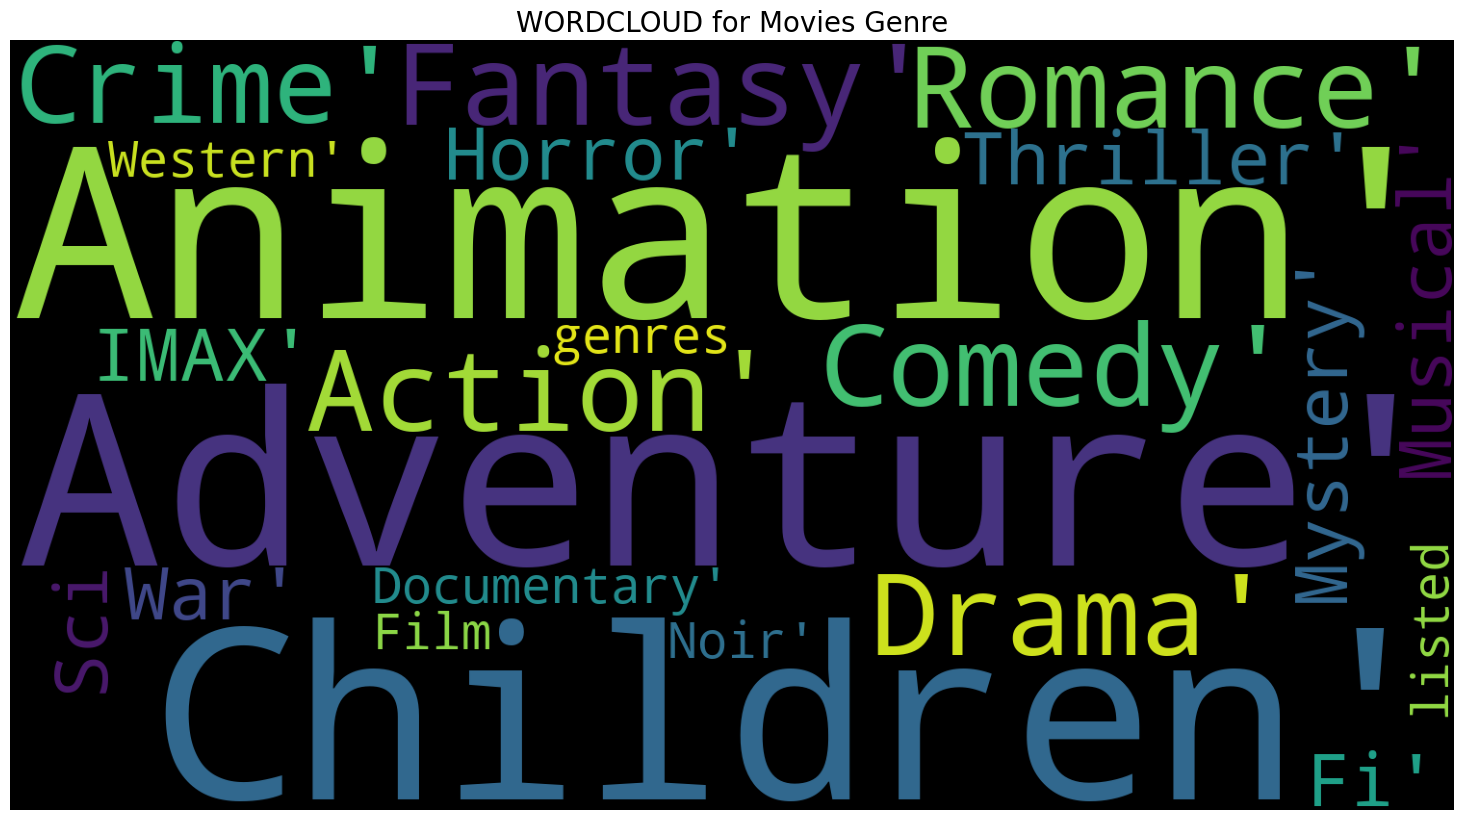

In [26]:
from wordcloud import WordCloud

genres=[]
for genre in movies_df.genres:
    
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    
movie_title=[]
for title in movies_df.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)

wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2
                    ,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2
                    ,min_word_length=3).generate(movie_title)

plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=20)
plt.imshow(wordcloud_genre)
plt.show()

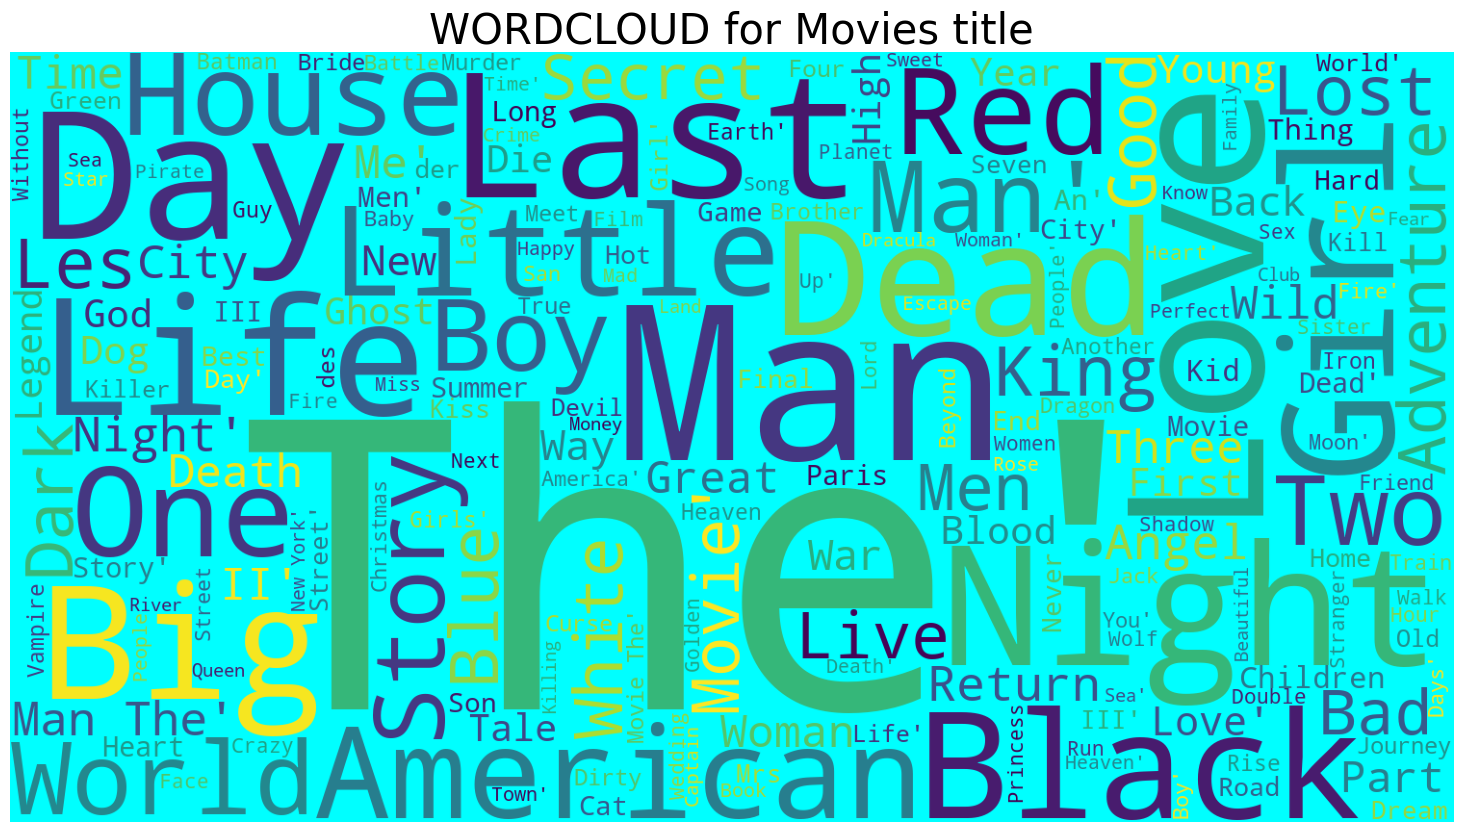

In [27]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies title',fontsize=30)
plt.imshow(wordcloud_title)
plt.show()

3. Design the 3 different types of recommendation modules as mentioned in the objectives

In [28]:
#Merging 'movies' and 'ratings'

movies_ratings_df = pd.merge(ratings_df,movies_df,on='movieId')
movies_ratings_df.drop('timestamp', axis=1, inplace=True)
movies_ratings_df

,userId,movieId,rating,title,genres
0,1,16,4.0,Casino (1995),Crime|Drama
1,1,24,1.5,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...
105329,668,142488,4.0,Spotlight (2015),Thriller
105330,668,142507,3.5,Pawn Sacrifice (2015),Drama
105331,668,143385,4.0,Bridge of Spies (2015),Drama|Thriller
105332,668,144976,2.5,Bone Tomahawk (2015),Horror|Western


In [29]:
movies_ratings_df.drop_duplicates(inplace=True)
movies_ratings_df.head()

,userId,movieId,rating,title,genres
0,1,16,4.0,Casino (1995),Crime|Drama
1,1,24,1.5,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [30]:
movies_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105334 entries, 0 to 105333
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   105334 non-null  int64  
 1   movieId  105334 non-null  int64  
 2   rating   105334 non-null  float64
 3   title    105334 non-null  object 
 4   genres   105334 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [31]:
movies_ratings_df.describe()

,userId,movieId,rating
count,105334.000000,105334.000000,105334.000000
mean,364.916475,13379.584180,3.516880
std,197.487373,26169.561127,1.044878
min,1.000000,1.000000,0.500000
25%,192.000000,1073.000000,3.000000
50%,383.000000,2496.000000,3.500000
75%,557.000000,5991.000000,4.000000
max,668.000000,149532.000000,5.000000


In [32]:
#Highest Rated Movies

movies_ranking = movies_ratings_df[['title','rating']].groupby('title').sum().sort_values('rating',ascending=False)
movies_ranking.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


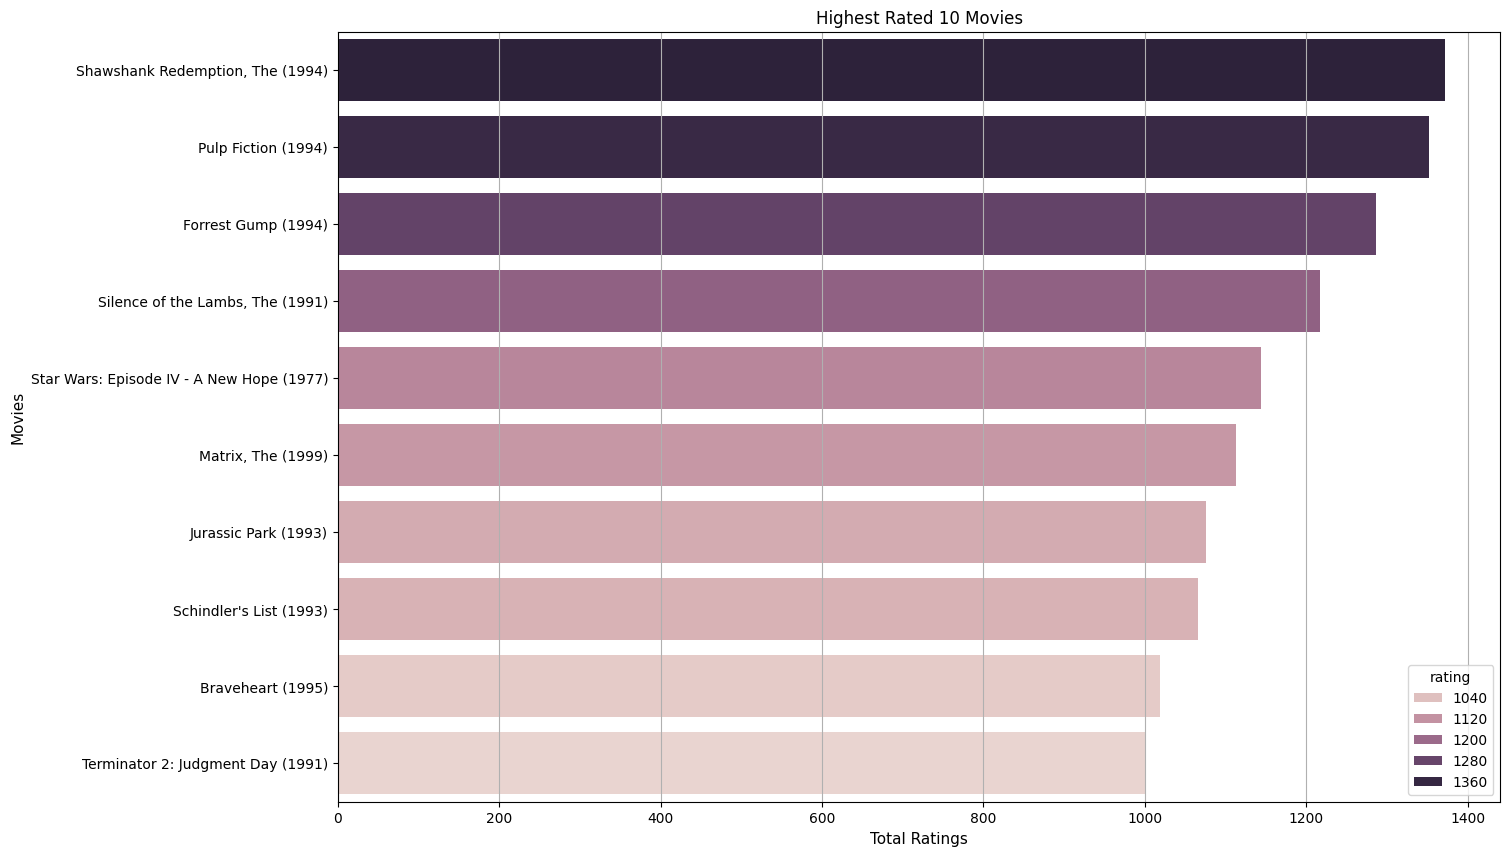

In [33]:
plt.figure(figsize=(15,10))
sns.barplot(data=movies_ranking.head(10), x='rating', y=movies_ranking.head(10).index, hue='rating')
plt.title("Highest Rated 10 Movies")
plt.xlabel("Total Ratings", fontsize=11)
plt.ylabel("Movies", fontsize=11)
plt.grid(True, axis='x')
plt.show()

In [34]:
#Count the ratings of all movies

movies_ratings_df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Pulp Fiction (1994)                          325
Forrest Gump (1994)                          311
Shawshank Redemption, The (1994)             308
Jurassic Park (1993)                         294
Silence of the Lambs, The (1991)             290
Star Wars: Episode IV - A New Hope (1977)    273
Matrix, The (1999)                           261
Terminator 2: Judgment Day (1991)            253
Braveheart (1995)                            248
Schindler's List (1993)                      248
Name: rating, dtype: int64

In [35]:
df1 = pd.DataFrame(movies_ratings_df.groupby('title')['rating'].count().sort_values(ascending=False))
df1.head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


In [36]:
#Creating a dataframe with mean 'rating_movie' and total number of ratings for each movie

rating_movie = pd.DataFrame(movies_ratings_df.groupby('title')['rating'].mean())
rating_movie['Number of Ratings'] = pd.DataFrame(movies_ratings_df.groupby('title')['rating'].count())
rating_movie.sort_values('Number of Ratings', ascending = False).head(10)

,rating,Number of Ratings
title,,
Pulp Fiction (1994),4.160000,325
Forrest Gump (1994),4.138264,311
"Shawshank Redemption, The (1994)",4.454545,308
Jurassic Park (1993),3.659864,294
"Silence of the Lambs, The (1991)",4.194828,290
Star Wars: Episode IV - A New Hope (1977),4.188645,273
"Matrix, The (1999)",4.264368,261
Terminator 2: Judgment Day (1991),3.960474,253
Braveheart (1995),4.108871,248


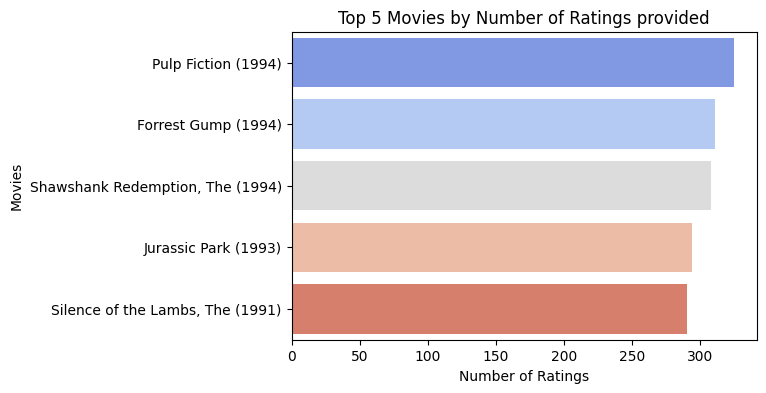

In [37]:
df2 = rating_movie.sort_values('Number of Ratings', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(y=df2.head(5).index, x="Number of Ratings", data=df2.head(5), orient='h', palette="coolwarm", saturation=0.75,
                 dodge=False)

plt.xlabel("Number of Ratings")
plt.ylabel("Movies")
plt.title("Top 5 Movies by Number of Ratings provided")
plt.show()

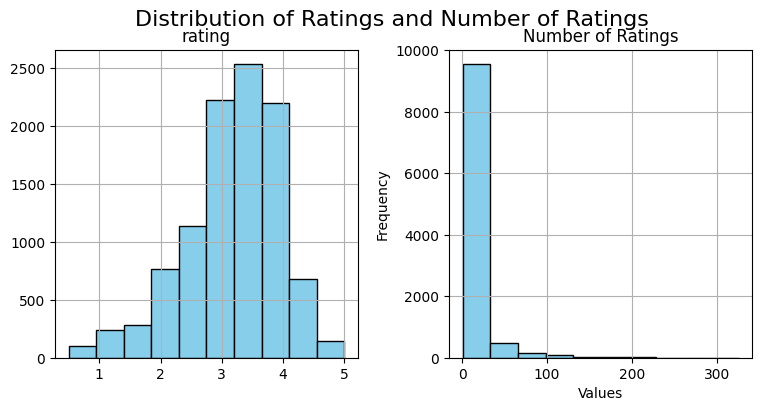

In [38]:
df2.hist(column=['rating', 'Number of Ratings'], color=['skyblue'], figsize=(9, 4), edgecolor='black')

plt.suptitle("Distribution of Ratings and Number of Ratings", fontsize=16)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

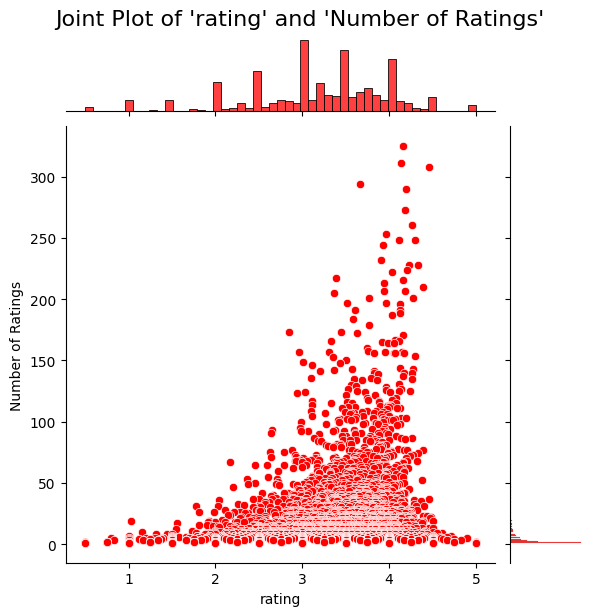

In [39]:
sns.jointplot(x='rating', y='Number of Ratings', data=df2, kind='scatter', color='red')
plt.suptitle("Joint Plot of 'rating' and 'Number of Ratings'", y=1.02, fontsize=16)
plt.show()

In [40]:
#Sorting values according to the 'num of rating column'

pivot_movie = movies_ratings_df.pivot_table(index ='userId',columns ='title', values ='rating')
pivot_movie.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Objective:

1. Create a popularity-based recommender system at a genre level

The user will input a genre (g), minimum rating threshold (t) for a movie, and no. of recommendations(N) for which it should be recommended top N movies which are most popular within that genre (g) ordered by ratings in descending order where each movie has at least (t) reviews.

Example: Input:

Genre (g) : Comedy
Minimum reviews threshold (t) : 100
Num recommendations (N) : 5

In [41]:
def popularity_recommender(genre, min_reviews, num_recommendations):
    # Filter by genre and minimum review threshold
    genre_movies = movies_ratings_df[(movies_ratings_df['genres'] == genre) & (movies_ratings_df['rating'] >= min_reviews)]
    
    if genre_movies.empty:
        return "No movies found for the given genre and minimum review threshold."
    
    # Sort by ratings in descending order
    sorted_movies = genre_movies.sort_values(by='rating', ascending=False)  

    # Recommend top N movies
    top_movies = sorted_movies.head(num_recommendations)
    
    return top_movies[['title', 'rating', 'userId']]

In [42]:
#input 1
genre = 'Comedy'
min_reviews_threshold = 5
num_recommendations = 10

# Get recommendations
recommendations = popularity_recommender(genre, min_reviews_threshold, num_recommendations)
recommendations

,title,rating,userId
158,Clerks (1994),5.0,3
75927,Hot Rod (2007),5.0,531
74928,Caddyshack (1980),5.0,525
74933,Kingpin (1996),5.0,526
74959,Ferris Bueller's Day Off (1986),5.0,526
74962,Road Trip (2000),5.0,526
75172,Zoolander (2001),5.0,528
75286,Blackadder's Christmas Carol (1988),5.0,529
75920,Borat: Cultural Learnings of America for Make ...,5.0,531
75929,Superbad (2007),5.0,531


In [43]:
#input 2
genre = 'Drama'
min_reviews_threshold = 5
num_recommendations = 3

# Get recommendations
recommendations = popularity_recommender(genre, min_reviews_threshold, num_recommendations)
recommendations

,title,rating,userId
123,Mr. Holland's Opus (1995),5.0,2
68954,Little Women (1994),5.0,471
68810,One Flew Over the Cuckoo's Nest (1975),5.0,469


2. Create a content-based recommender system that recommends top N movies based on similar movie(m) genres

Example: Input:

Movie Title (t): Toy Story
Num recommendations (N): 5

In [44]:
movies_ratings_df.head()

,userId,movieId,rating,title,genres
0,1,16,4.0,Casino (1995),Crime|Drama
1,1,24,1.5,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [55]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

def content_based_recommender(movie_title, num_recommendations):
    # Find the row index of the input movie title
    movie_index = movies_ratings_df.index[movies_ratings_df['title'] == movie_title].tolist()[0]
    
    # Extract genres of all movies
    genres = movies_ratings_df['genres']
    
    # Initialize CountVectorizer to convert text data into token counts
    count_vectorizer = CountVectorizer()
    genre_matrix = count_vectorizer.fit_transform(genres)

    # Calculate cosine similarity between the input movie and all other movies
    similarity_scores = cosine_similarity(genre_matrix, genre_matrix[movie_index])
    
    # Enumerate through similarity scores and keep track of movie indices
    movie_indices_scores = list(enumerate(similarity_scores))

    # Sort movie indices based on similarity scores
    sorted_movie_indices = sorted(movie_indices_scores, key=lambda x: x[1], reverse=True)
    
    # Exclude the input movie itself
    sorted_movie_indices = sorted_movie_indices[1:]

    # Recommend top N similar movies
    top_movie_indices = [index for index, _ in sorted_movie_indices[:num_recommendations]]
    recommended_movies = movies_ratings_df.iloc[top_movie_indices]
    
    return recommended_movies[['title', 'genres']]

In [57]:
import random
movie=random.choice(movies_ratings_df.title.unique())
print("Recommendation for movie :  {}\n".format(movie))
suggestion=content_based_recommender(movie,rating_movie["Number of Ratings"].max())
if(len(suggestion)==0):
    print("Not enough ratings to Recommend other Movies")
else:
    print(suggestion[['title', 'genres']])
#user can filter how many rating coutings is needed to get result

Recommendation for movie :  Flesh and the Devil (1926)

                              title         genres
57                   Titanic (1997)  Drama|Romance
76           American Beauty (1999)  Drama|Romance
90         Beautiful Mind, A (2001)  Drama|Romance
117    Sense and Sensibility (1995)  Drama|Romance
118        Leaving Las Vegas (1995)  Drama|Romance
...                             ...            ...
11124             Phenomenon (1996)  Drama|Romance
11330                  Lucas (1986)  Drama|Romance
11339      Beautiful Mind, A (2001)  Drama|Romance
11378      Good Will Hunting (1997)  Drama|Romance
11387        American Beauty (1999)  Drama|Romance

[325 rows x 2 columns]


In [62]:
# input 1
movie_title = 'Toy Story (1995)'
num_recommendations = 5

# Get recommendations
recommendations = content_based_recommender(movie_title, num_recommendations)
recommendations

,title,genres
333,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy
339,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
376,"Emperor's New Groove, The (2000)",Adventure|Animation|Children|Comedy|Fantasy
435,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy
629,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


3. Create a collaborative based recommender system which recommends top N movies based on “K” similar users for a target user “u"

Example: Input:

UserID: 1
Num recommendations(N): 5
Threshold for similar users (k): 100

In [68]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

# Step 1: Create a user-item matrix
user_movie_matrix = movies_ratings_df.pivot_table(index='userId', columns='title', values='rating').fillna(0)

# Step 2: Use Nearest Neighbors to find similar users
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_movie_matrix)

def collaborative_recommender(user_id, num_recommendations, k):
    # Find the index of the target user
    target_user_index = user_movie_matrix.index.get_loc(user_id)

    # Use kneighbors to find K similar users
    _, similar_users_indices = knn_model.kneighbors(user_movie_matrix.iloc[target_user_index].values.reshape(1, -1), n_neighbors=k+1)

    # Flatten the list of similar users indices
    similar_users_indices = similar_users_indices.flatten()

    # Get movies watched by the target user
    movies_watched = user_movie_matrix.iloc[target_user_index][user_movie_matrix.iloc[target_user_index] > 0].index.tolist()

    # Create a list of movies recommended by similar users, excluding movies already watched
    recommended_movies = []
    for similar_user_index in similar_users_indices:
        similar_user_movies = user_movie_matrix.iloc[similar_user_index][user_movie_matrix.iloc[similar_user_index] > 0].index.tolist()
        recommended_movies.extend([movie for movie in similar_user_movies if movie not in movies_watched])

    # Get top N recommended movies
    recommended_movies = list(set(recommended_movies))[:num_recommendations]

    return pd.DataFrame({'title': recommended_movies})

In [70]:
# Example usage 1
user_id_input = 1
num_recommendations_input = 5
k_input = 100

collaborative_recommendations = collaborative_recommender(user_id_input, num_recommendations_input, k_input)
collaborative_recommendations


,title
0,"Next Karate Kid, The (1994)"
1,World Trade Center (2006)
2,Coffee and Cigarettes (2003)
3,Jawbreaker (1999)
4,Bolt (2008)


In [71]:
# Example usage 2
user_id_input = 12
num_recommendations_input = 5
k_input = 100

collaborative_recommendations = collaborative_recommender(user_id_input, num_recommendations_input, k_input)
collaborative_recommendations

,title
0,"Next Karate Kid, The (1994)"
1,Freaky Friday (1977)
2,Radio Flyer (1992)
3,Snow Cake (2006)
4,"Lady Eve, The (1941)"


=========================================END==============================================